# **Chapter 3. Python 을 활용한 데이터 전처리** 





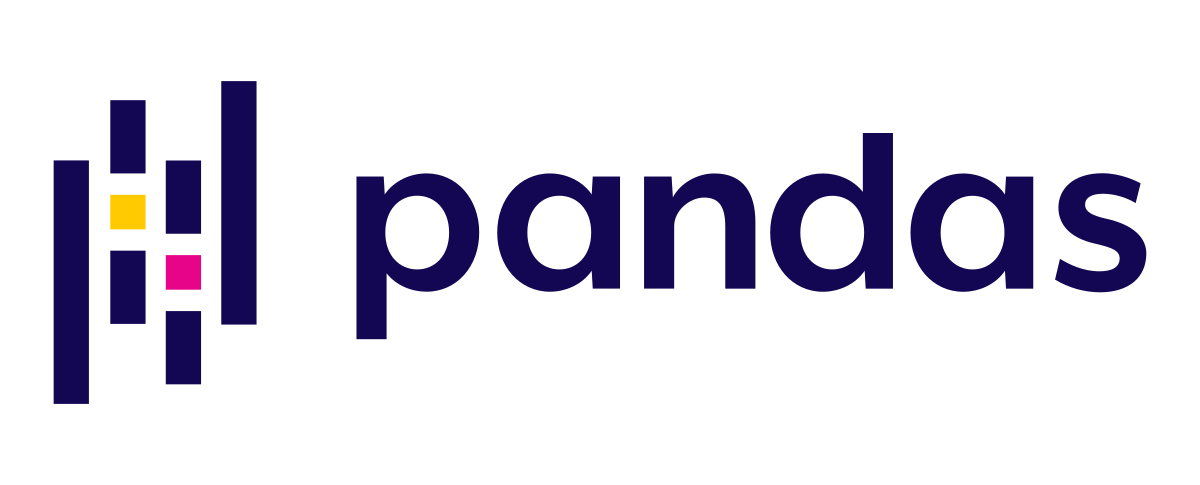


---
### **학습 목표**
> 3-4. Pandas 란? <br>
> 3-5. csv, excel 파일 읽고 쓰기, 요약 정보 한눈에 확인하기 <br>
> 3-6. 데이터 슬라이싱을 통해 Pandas 익숙해지기 <br>
> 3-7. 통계값 계산 및 정렬 방법 익히기 <br>
> 3-8. 피벗 테이블(pivot table) 기능과 그룹 통계(groupby) <br>
> 3-9. 데이터 합치기 (Join 과 Merge, Concat) <br>
> 3-10. 자료형 변환, 산술 연산 <br>
> **3-11. 전처리의 기본! 결측값, 중복 처리** <br>
> 3-12. 고급 기능 (apply, lambda, map) 으로 나도 이제 Pandas 고수! <br>
> 3-13. Pandas 시각화로 멋지게 레포팅하자 <br>
> 3-14. 실습 예제 <br>

## 3-11. 결측값, 중복 처리

In [1]:
# 라이브러리 임포트
import pandas as pd
import numpy as np

In [2]:
# 실습 파일 로딩 (아이돌 프로필)
# df = pd.read_csv('https://bit.ly/3gRXTfD')
df = pd.read_csv('kpop_idols.csv')
df

Profile Stage Name        Full Name Korean Name K. Stage Name  \
0     Profile    Taeyeon      Kim Taeyeon         김태연            태연   
1         NaN      Sunny       Lee Sunkyu         이순규            써니   
2         NaN    Tiffany    Hwang Miyoung         황미영           티파니   
3         NaN    Hyoyeon      Kim Hyoyeon         김효연            효연   
4         NaN       Yuri        Kwon Yuri         권유리            유리   
...       ...        ...              ...         ...           ...   
1589      NaN     Ririka   Kishida Ririka     키시다 리리카           리리카   
1590      NaN       Nayu        Kim Yewon         김예원            나유   
1591      NaN       Elva      Lee Yonghwa         이용화            엘바   
1592      NaN       Lily  Lily Jin Morrow    릴리 진 머로우            릴리   
1593      NaN     Haewon        Oh Haewon         오해원            해원   

     Date of Birth  Group      Country Second Country  Height  Weight  \
0       1989-03-09   SNSD  South Korea            NaN     160      44   
1       1989-05-15   SNSD  South Korea            NaN     158      43   
2       1989-08-01   SNSD  South Korea            USA     163      50   
3       1989-09-22   SNSD  South Korea            NaN     158      48   
4       1989-12-05   SNSD  South Korea            NaN     167      45   
...            ...    ...          ...            ...     ...     ...   
1589    2002-07-02  ILY:1        Japan            NaN     162       0   
1590    2002-07-23  ILY:1  South Korea            NaN       0       0   
1591    2003-05-05  ILY:1  South Korea            NaN       0       0   
1592    2002-10-17  NMIXX    Australia    South Korea       0       0   
1593    2003-02-25  NMIXX  South Korea            NaN       0       0   

         Birthplace Other Group Former Group Gender               Position  \
0            Jeonju  TTS, Oh!GG          NaN      F  Leader, Main Vocalist   
1        California         NaN          NaN      F                    NaN   
2     San Francisco         TTS          NaN      F                    NaN   
3           Incheon         NaN          NaN      F                    NaN   
4            Goyang         NaN          NaN      F                    NaN   
...             ...         ...          ...    ...                    ...   
1589            NaN         NaN          NaN      F                    NaN   
1590            NaN         NaN          NaN      F                    NaN   
1591            NaN         NaN          NaN      F                    NaN   
1592     Marysville         NaN          NaN      F                    NaN   
1593            NaN         NaN          NaN      F                    NaN   

         Instagram Twitter  
0       taeyeon_ss     NaN  
1       svnnynight     NaN  
2     xolovestephi     NaN  
3      watasiwahyo     NaN  
4          yulyulk     NaN  
...            ...     ...  
1589           NaN     NaN  
1590           NaN     NaN  
1591           NaN     NaN  
1592           NaN     NaN  
1593           NaN     NaN  

[1594 rows x 18 columns]

In [3]:
# 상위 10개 정보 사용
df = df.iloc[15:30]

In [4]:
df = df[['K. Stage Name', 'Date of Birth', 'Group', 'Height', 'Weight', 'Birthplace']]
df

K. Stage Name Date of Birth    Group  Height  Weight Birthplace
15            소유    1992-02-12   SISTAR       0       0        NaN
16            다솜    1993-05-06   SISTAR       0       0        NaN
17            지현    1990-01-09  4minute     167       0      Seoul
18            가윤    1990-05-18  4minute     165       0      Seoul
19            지윤    1990-10-15  4minute     165       0      Seoul
20            현아    1992-06-06  4minute     164       0     Jeolla
21            소현    1994-08-30  4minute     162       0      Seoul
22            지민    1991-01-08      NaN     160      43      Seoul
23            초아    1990-03-06      NaN     160      42    Incheon
24            유나    1992-12-30      AoA     163      45      Busan
25            유경    1993-03-15      NaN     167      48        NaN
26            혜정    1993-08-10      AoA     170      48      Seoul
27            민아    1993-09-21      NaN     159      43      Busan
28            설현    1995-01-03      AoA     167      47    Bucheon
29            찬미    1996-06-19      AoA     166      47       Gumi

> ###  **3-11-1. 결측값 처리**


> 결측값이란? 
> - 자료가 입력되지 않은 값, **입력이 누락된 값**을 의미합니다.
> - 현실의 **거의 모든 데이터에는 결측값이 존재**할 수 있습니다.
> - 결측값을 어떤 방식으로 처리하느냐에 따라 **데이터 분석 결과가 달라질 수 있습니다.**
> - **NaN, N/A, NULL, 0값** 등 다양한 방식으로 불리고 있습니다.

> **1. 데이터 탐색**

In [5]:
df

K. Stage Name Date of Birth    Group  Height  Weight Birthplace
15            소유    1992-02-12   SISTAR       0       0        NaN
16            다솜    1993-05-06   SISTAR       0       0        NaN
17            지현    1990-01-09  4minute     167       0      Seoul
18            가윤    1990-05-18  4minute     165       0      Seoul
19            지윤    1990-10-15  4minute     165       0      Seoul
20            현아    1992-06-06  4minute     164       0     Jeolla
21            소현    1994-08-30  4minute     162       0      Seoul
22            지민    1991-01-08      NaN     160      43      Seoul
23            초아    1990-03-06      NaN     160      42    Incheon
24            유나    1992-12-30      AoA     163      45      Busan
25            유경    1993-03-15      NaN     167      48        NaN
26            혜정    1993-08-10      AoA     170      48      Seoul
27            민아    1993-09-21      NaN     159      43      Busan
28            설현    1995-01-03      AoA     167      47    Bucheon
29            찬미    1996-06-19      AoA     166      47       Gumi

In [6]:
# 0값을 NaN 형으로 변환
df = df.replace(0, np.nan)

In [7]:
df

K. Stage Name Date of Birth    Group  Height  Weight Birthplace
15            소유    1992-02-12   SISTAR     NaN     NaN        NaN
16            다솜    1993-05-06   SISTAR     NaN     NaN        NaN
17            지현    1990-01-09  4minute   167.0     NaN      Seoul
18            가윤    1990-05-18  4minute   165.0     NaN      Seoul
19            지윤    1990-10-15  4minute   165.0     NaN      Seoul
20            현아    1992-06-06  4minute   164.0     NaN     Jeolla
21            소현    1994-08-30  4minute   162.0     NaN      Seoul
22            지민    1991-01-08      NaN   160.0    43.0      Seoul
23            초아    1990-03-06      NaN   160.0    42.0    Incheon
24            유나    1992-12-30      AoA   163.0    45.0      Busan
25            유경    1993-03-15      NaN   167.0    48.0        NaN
26            혜정    1993-08-10      AoA   170.0    48.0      Seoul
27            민아    1993-09-21      NaN   159.0    43.0      Busan
28            설현    1995-01-03      AoA   167.0    47.0    Bucheon
29            찬미    1996-06-19      AoA   166.0    47.0       Gumi

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 15 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   K. Stage Name  15 non-null     object 
 1   Date of Birth  15 non-null     object 
 2   Group          11 non-null     object 
 3   Height         13 non-null     float64
 4   Weight         8 non-null      float64
 5   Birthplace     12 non-null     object 
dtypes: float64(2), object(4)
memory usage: 852.0+ bytes


> **2. 결측 데이터 확인 (`isnull()`, `notnull()`)**

In [9]:
df.isnull()

K. Stage Name  Date of Birth  Group  Height  Weight  Birthplace
15          False          False  False    True    True        True
16          False          False  False    True    True        True
17          False          False  False   False    True       False
18          False          False  False   False    True       False
19          False          False  False   False    True       False
20          False          False  False   False    True       False
21          False          False  False   False    True       False
22          False          False   True   False   False       False
23          False          False   True   False   False       False
24          False          False  False   False   False       False
25          False          False   True   False   False        True
26          False          False  False   False   False       False
27          False          False   True   False   False       False
28          False          False  False   False   False       False
29          False          False  False   False   False       False

In [10]:
df.notnull()

K. Stage Name  Date of Birth  Group  Height  Weight  Birthplace
15           True           True   True   False   False       False
16           True           True   True   False   False       False
17           True           True   True    True   False        True
18           True           True   True    True   False        True
19           True           True   True    True   False        True
20           True           True   True    True   False        True
21           True           True   True    True   False        True
22           True           True  False    True    True        True
23           True           True  False    True    True        True
24           True           True   True    True    True        True
25           True           True  False    True    True       False
26           True           True   True    True    True        True
27           True           True  False    True    True        True
28           True           True   True    True    True        True
29           True           True   True    True    True        True

In [11]:
# 결측인 값은 (True) 1로 처리
df.isnull().sum()

K. Stage Name    0
Date of Birth    0
Group            4
Height           2
Weight           7
Birthplace       3
dtype: int64

> **3. 결측 데이터 제거 (`dropna()`)**

In [12]:
# 기본적으로 결측인 값이 존재하면 행 모두 삭제합니다,
df.dropna()

K. Stage Name Date of Birth Group  Height  Weight Birthplace
24            유나    1992-12-30   AoA   163.0    45.0      Busan
26            혜정    1993-08-10   AoA   170.0    48.0      Seoul
28            설현    1995-01-03   AoA   167.0    47.0    Bucheon
29            찬미    1996-06-19   AoA   166.0    47.0       Gumi

In [13]:
# subset=['컬럼명'] 옵션을 지정하면 해당 컬럼만 검사합니다.
df.dropna(subset=['Group'])

K. Stage Name Date of Birth    Group  Height  Weight Birthplace
15            소유    1992-02-12   SISTAR     NaN     NaN        NaN
16            다솜    1993-05-06   SISTAR     NaN     NaN        NaN
17            지현    1990-01-09  4minute   167.0     NaN      Seoul
18            가윤    1990-05-18  4minute   165.0     NaN      Seoul
19            지윤    1990-10-15  4minute   165.0     NaN      Seoul
20            현아    1992-06-06  4minute   164.0     NaN     Jeolla
21            소현    1994-08-30  4minute   162.0     NaN      Seoul
24            유나    1992-12-30      AoA   163.0    45.0      Busan
26            혜정    1993-08-10      AoA   170.0    48.0      Seoul
28            설현    1995-01-03      AoA   167.0    47.0    Bucheon
29            찬미    1996-06-19      AoA   166.0    47.0       Gumi

In [14]:
# subset=['컬럼명'] 옵션을 지정하면 해당 컬럼만 검사합니다.
df.dropna(subset=['Group', 'Height'])

K. Stage Name Date of Birth    Group  Height  Weight Birthplace
17            지현    1990-01-09  4minute   167.0     NaN      Seoul
18            가윤    1990-05-18  4minute   165.0     NaN      Seoul
19            지윤    1990-10-15  4minute   165.0     NaN      Seoul
20            현아    1992-06-06  4minute   164.0     NaN     Jeolla
21            소현    1994-08-30  4minute   162.0     NaN      Seoul
24            유나    1992-12-30      AoA   163.0    45.0      Busan
26            혜정    1993-08-10      AoA   170.0    48.0      Seoul
28            설현    1995-01-03      AoA   167.0    47.0    Bucheon
29            찬미    1996-06-19      AoA   166.0    47.0       Gumi

> **4-1. 결측 데이터 치환 (`fillna()`)**
> - 결측 값을 대체하주는 함수입니다. **`fillna('결측값을 대체할 값')`** 형태로 사용합니다.

In [15]:
df = df.dropna(subset=['Group'])
df

K. Stage Name Date of Birth    Group  Height  Weight Birthplace
15            소유    1992-02-12   SISTAR     NaN     NaN        NaN
16            다솜    1993-05-06   SISTAR     NaN     NaN        NaN
17            지현    1990-01-09  4minute   167.0     NaN      Seoul
18            가윤    1990-05-18  4minute   165.0     NaN      Seoul
19            지윤    1990-10-15  4minute   165.0     NaN      Seoul
20            현아    1992-06-06  4minute   164.0     NaN     Jeolla
21            소현    1994-08-30  4minute   162.0     NaN      Seoul
24            유나    1992-12-30      AoA   163.0    45.0      Busan
26            혜정    1993-08-10      AoA   170.0    48.0      Seoul
28            설현    1995-01-03      AoA   167.0    47.0    Bucheon
29            찬미    1996-06-19      AoA   166.0    47.0       Gumi

> **4-2. 지정 값으로 대체 (`fillna('대체값')`)**

In [16]:
# 지정 값으로 대체
df['Height'] = df['Height'].fillna(160)

C:\Users\m11\AppData\Local\Temp\ipykernel_11228\1808648884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Height'] = df['Height'].fillna(160)


In [17]:
df

K. Stage Name Date of Birth    Group  Height  Weight Birthplace
15            소유    1992-02-12   SISTAR   160.0     NaN        NaN
16            다솜    1993-05-06   SISTAR   160.0     NaN        NaN
17            지현    1990-01-09  4minute   167.0     NaN      Seoul
18            가윤    1990-05-18  4minute   165.0     NaN      Seoul
19            지윤    1990-10-15  4minute   165.0     NaN      Seoul
20            현아    1992-06-06  4minute   164.0     NaN     Jeolla
21            소현    1994-08-30  4minute   162.0     NaN      Seoul
24            유나    1992-12-30      AoA   163.0    45.0      Busan
26            혜정    1993-08-10      AoA   170.0    48.0      Seoul
28            설현    1995-01-03      AoA   167.0    47.0    Bucheon
29            찬미    1996-06-19      AoA   166.0    47.0       Gumi

> **4-3. 평균 값으로 대체 (`fillna('평균값')`)**

In [18]:
# 평균 값으로 대체
mean_value = df['Weight'].mean()
df['Weight'] = df['Weight'].fillna(mean_value)

C:\Users\m11\AppData\Local\Temp\ipykernel_11228\2180662588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight'] = df['Weight'].fillna(mean_value)


In [19]:
df

K. Stage Name Date of Birth    Group  Height  Weight Birthplace
15            소유    1992-02-12   SISTAR   160.0   46.75        NaN
16            다솜    1993-05-06   SISTAR   160.0   46.75        NaN
17            지현    1990-01-09  4minute   167.0   46.75      Seoul
18            가윤    1990-05-18  4minute   165.0   46.75      Seoul
19            지윤    1990-10-15  4minute   165.0   46.75      Seoul
20            현아    1992-06-06  4minute   164.0   46.75     Jeolla
21            소현    1994-08-30  4minute   162.0   46.75      Seoul
24            유나    1992-12-30      AoA   163.0   45.00      Busan
26            혜정    1993-08-10      AoA   170.0   48.00      Seoul
28            설현    1995-01-03      AoA   167.0   47.00    Bucheon
29            찬미    1996-06-19      AoA   166.0   47.00       Gumi

> **4-3. 최빈 값으로 대체 (`fillna('최빈값')`)**
> - 값을 세어주는 함수 **`value_counts()`** 를 활용하면, 최빈값을 알아낼 수 있습니다.

In [20]:
df['Birthplace'].value_counts()

Birthplace
Seoul      5
Jeolla     1
Busan      1
Bucheon    1
Gumi       1
Name: count, dtype: int64

In [21]:
df['Birthplace'].value_counts().index

Index(['Seoul', 'Jeolla', 'Busan', 'Bucheon', 'Gumi'], dtype='object', name='Birthplace')

In [22]:
df['Birthplace'].value_counts().index[0]

'Seoul'

In [23]:
df['Birthplace'] = df['Birthplace'].fillna(df['Birthplace'].value_counts().index[0])

C:\Users\m11\AppData\Local\Temp\ipykernel_11228\2021075981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Birthplace'] = df['Birthplace'].fillna(df['Birthplace'].value_counts().index[0])


In [24]:
df

K. Stage Name Date of Birth    Group  Height  Weight Birthplace
15            소유    1992-02-12   SISTAR   160.0   46.75      Seoul
16            다솜    1993-05-06   SISTAR   160.0   46.75      Seoul
17            지현    1990-01-09  4minute   167.0   46.75      Seoul
18            가윤    1990-05-18  4minute   165.0   46.75      Seoul
19            지윤    1990-10-15  4minute   165.0   46.75      Seoul
20            현아    1992-06-06  4minute   164.0   46.75     Jeolla
21            소현    1994-08-30  4minute   162.0   46.75      Seoul
24            유나    1992-12-30      AoA   163.0   45.00      Busan
26            혜정    1993-08-10      AoA   170.0   48.00      Seoul
28            설현    1995-01-03      AoA   167.0   47.00    Bucheon
29            찬미    1996-06-19      AoA   166.0   47.00       Gumi

> **5. `reset_index()` 로 인덱스 재정렬**
> - 결측치를 제거하거나, **전처리하는 과정에서 데이터 프레임의 인덱스가 바뀌는 현상은 자주 일어납니다.**
> - 이때, `reset_index()` 를 써서 마지막에 인덱스를 정렬해주면,
> - 이후에 진행하게되는 **분석과정에 문제가 발생할 확률이 줄어듭니다!**

In [25]:
# 'drop=True' 옵션은 이전의 인덱스를 버린다는 의미입니다.
df = df.reset_index(drop=True)

In [26]:
df

K. Stage Name Date of Birth    Group  Height  Weight Birthplace
0             소유    1992-02-12   SISTAR   160.0   46.75      Seoul
1             다솜    1993-05-06   SISTAR   160.0   46.75      Seoul
2             지현    1990-01-09  4minute   167.0   46.75      Seoul
3             가윤    1990-05-18  4minute   165.0   46.75      Seoul
4             지윤    1990-10-15  4minute   165.0   46.75      Seoul
5             현아    1992-06-06  4minute   164.0   46.75     Jeolla
6             소현    1994-08-30  4minute   162.0   46.75      Seoul
7             유나    1992-12-30      AoA   163.0   45.00      Busan
8             혜정    1993-08-10      AoA   170.0   48.00      Seoul
9             설현    1995-01-03      AoA   167.0   47.00    Bucheon
10            찬미    1996-06-19      AoA   166.0   47.00       Gumi

> ###  **3-11-2. 중복값 처리**


> 중복값이란? 
> - 자료가 **중복으로 입력된 값**을 의미합니다.
> - **전체 행/열이 중복**된 경우, 혹은 **값이 중복된 경우**가 있습니다.
> - 중복값을 어떤 방식으로 처리하느냐에 따라 **데이터 분석 결과가 달라질 수 있습니다.**

In [27]:
# 중복 데이터 임의로 생성
df = pd.concat([df, pd.DataFrame([df.iloc[-1]])], ignore_index=True)

In [28]:
df

K. Stage Name Date of Birth    Group  Height  Weight Birthplace
0             소유    1992-02-12   SISTAR   160.0   46.75      Seoul
1             다솜    1993-05-06   SISTAR   160.0   46.75      Seoul
2             지현    1990-01-09  4minute   167.0   46.75      Seoul
3             가윤    1990-05-18  4minute   165.0   46.75      Seoul
4             지윤    1990-10-15  4minute   165.0   46.75      Seoul
5             현아    1992-06-06  4minute   164.0   46.75     Jeolla
6             소현    1994-08-30  4minute   162.0   46.75      Seoul
7             유나    1992-12-30      AoA   163.0   45.00      Busan
8             혜정    1993-08-10      AoA   170.0   48.00      Seoul
9             설현    1995-01-03      AoA   167.0   47.00    Bucheon
10            찬미    1996-06-19      AoA   166.0   47.00       Gumi
11            찬미    1996-06-19      AoA   166.0   47.00       Gumi

> **1. 중복 데이터 탐색 (`duplicated()`)**
> - `duplicated()` 함수는 행이 완벽히 중복된 여부를 검사합니다.
> - 특정 열에 중복값이 있는지 확인을 할 수 도 있습니다.

In [29]:
# 중복된 행 찾기
df[df.duplicated()]

K. Stage Name Date of Birth Group  Height  Weight Birthplace
11            찬미    1996-06-19   AoA   166.0    47.0       Gumi

In [30]:
# 특정 열에 중복 값 찾기
df['Group'].duplicated()

0     False
1      True
2     False
3      True
4      True
5      True
6      True
7     False
8      True
9      True
10     True
11     True
Name: Group, dtype: bool

> **2. 중복 데이터 제거 (`drop_duplicates()`)**

In [31]:
# 기본적으로 완벽히 중복된 행을 제거합니다.
df.drop_duplicates()

K. Stage Name Date of Birth    Group  Height  Weight Birthplace
0             소유    1992-02-12   SISTAR   160.0   46.75      Seoul
1             다솜    1993-05-06   SISTAR   160.0   46.75      Seoul
2             지현    1990-01-09  4minute   167.0   46.75      Seoul
3             가윤    1990-05-18  4minute   165.0   46.75      Seoul
4             지윤    1990-10-15  4minute   165.0   46.75      Seoul
5             현아    1992-06-06  4minute   164.0   46.75     Jeolla
6             소현    1994-08-30  4minute   162.0   46.75      Seoul
7             유나    1992-12-30      AoA   163.0   45.00      Busan
8             혜정    1993-08-10      AoA   170.0   48.00      Seoul
9             설현    1995-01-03      AoA   167.0   47.00    Bucheon
10            찬미    1996-06-19      AoA   166.0   47.00       Gumi

In [32]:
# 특정 열을 기준으로 제거
df.drop_duplicates(subset= ['Group'])

K. Stage Name Date of Birth    Group  Height  Weight Birthplace
0            소유    1992-02-12   SISTAR   160.0   46.75      Seoul
2            지현    1990-01-09  4minute   167.0   46.75      Seoul
7            유나    1992-12-30      AoA   163.0   45.00      Busan

In [33]:
# 특정 열을 기준으로 제거 (마지막 값 남기기)
df.drop_duplicates(subset= ['Group'], keep='last')

K. Stage Name Date of Birth    Group  Height  Weight Birthplace
1             다솜    1993-05-06   SISTAR   160.0   46.75      Seoul
6             소현    1994-08-30  4minute   162.0   46.75      Seoul
11            찬미    1996-06-19      AoA   166.0   47.00       Gumi